# Phase portraits and forced periodic solutions
March 18th, 2023
Scritp to test some pjase portraits and forced periodic solutions

In [1]:
# loading libraries
from loaddata import *
from fit_isol import *
from fitting import *
from validation import *
from save_all import *
from load_all import *
from omega_gamma import *
import pandas as pd
#from tkinter import W
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from numpy import array
from myfunctions import rhs_vac, rk4, theta_func, rhs_vac_theta, theta_func_1
from numpy import polynomial, trapz, meshgrid, linspace, array2string, zeros
import time
import random

In [2]:
dados_para_fit, dados_para_val = loaddata()

# load previously saved data from file
csv1 = 'data_iso-2023-03-06-19-38-55.csv'
csv2 = 'data_dyn-2023-03-06-19-38-55.csv'

dados_fit_isol_saved, dados_fit_din_saved = load_all(csv1, csv2)

dados_din = dados_fit_din_saved
dados_iso = dados_fit_isol_saved

mu = float(dados_din.loc['mu']['Valor'])
gamma = float(dados_din.loc['gamma']['Valor'])
alpha = float(dados_din.loc['alpha']['Valor'])
beta1 = float(dados_din.loc['beta1']['Valor'])
beta2 = float(dados_din.loc['beta2']['Valor'])
beta3 = float(dados_din.loc['beta3']['Valor'])
omega = 0.005
# with omega>=0.005 there is and theta oscillanting there is a limit cicle
i0 = float(dados_din.loc['i0']['Valor'])
s0 = float(dados_din.loc['s0']['Valor'])
sick0 = float(dados_din.loc['sick0']['Valor'])
#
theta0 = float(dados_iso.loc['theta0']['Valor'])
theta1 = float(dados_iso.loc['theta1']['Valor'])
theta_coef = polynomial.Polynomial([theta0, theta1])
#
tot_pop = tot_pop = dados_para_val['Pop'].to_numpy()[0]

Loading data...
Data loaded...OK!

Loading data from file: data_iso-2023-03-06-19-38-55.csv

Loading data from file: data_dyn-2023-03-06-19-38-55.csv

Data loaded successfully...OK!



## The periodic orbit

In [3]:
# note:
# 1 = s(t)+i(t)+sick(t)+r(t),
# at IC
# 1 = s0+i0+sick0, because r(0)=0
# and from the fitting we got,
# i0 = 1.46 x sick0

t0 = 0
tf = 20000
h = 1

N = 50 # number of randon interactions
sols = zeros([N,tf+1,3])

s0_max = 0.80
s0_min = 0.70
sick0_min = 1e-3
sick0_max = 9e-3

for k in range(N):
    s0 = random.randrange(s0_min*1000, s0_max*1000, 1)/1000 # 0.6 -> 1.0
    sick0 = random.randrange(sick0_min*10000, sick0_max*10000, 1)/10000 # 0.001 -> 0.009
    i0 = 1.4621370898415689*sick0
    x0 = array([s0, i0, sick0])
    # The function rhs_vac_theta function uses a periorid sinal for theta
    t, sols[k,:,:] = rk4(lambda t, x: rhs_vac_theta(t, x, mu, gamma,\
                                        alpha, theta_coef,\
                                        beta1, beta2, beta3,\
                                        omega), x0, t0, tf, h)
print('Done')

/tmp/ipykernel_21325/2322573165.py:21: DeprecationWarning: non-integer arguments to randrange() have been deprecated since Python 3.10 and will be removed in a subsequent version
  s0 = random.randrange(s0_min*1000, s0_max*1000, 1)/1000 # 0.6 -> 1.0
/tmp/ipykernel_21325/2322573165.py:22: DeprecationWarning: non-integer arguments to randrange() have been deprecated since Python 3.10 and will be removed in a subsequent version
  sick0 = random.randrange(sick0_min*10000, sick0_max*10000, 1)/10000 # 0.001 -> 0.009


Done


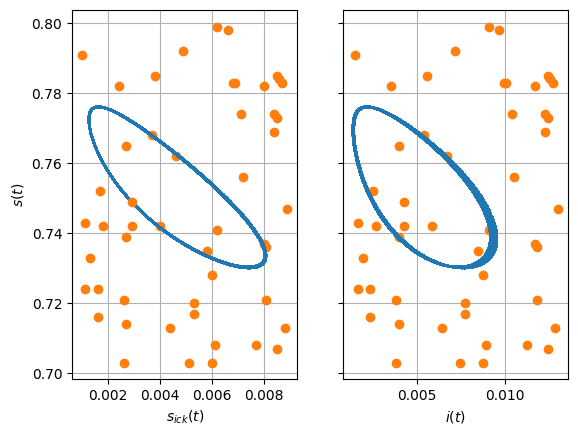

In [4]:
save_figs = False
#
t1 = 800;
t2 = -1;
#
fig, axes = plt.subplots(1,2, sharey=True)
for k in range(N):
    axes[0].plot(sols[k,t1:t2,2], sols[k,t1:t2,0], color='tab:blue')
    axes[0].plot(sols[k,0,2], sols[k,0,0],'o', color='tab:orange')
    #
    axes[1].plot(sols[k,t1:t2,1], sols[k,t1:t2,0], color='tab:blue')
    axes[1].plot(sols[k,0,1], sols[k,0,0],'o', color='tab:orange')
#
axes[0].set_xlabel('$s_{ick}(t)$')
axes[0].set_ylabel('$s(t)$')
axes[0].grid()
axes[1].set_xlabel('$i(t)$')
axes[1].grid()
#
if save_figs:
    timestr = time.strftime("%Y-%m-%d-%H-%M-%S")
    filename = 'figures/phase_portrait_'+timestr+'.eps'
    plt.savefig(filename, format='eps', bbox_inches='tight')
#
plt.show()

## The phase portrait
The phase portrait depends on time, so it is not possible to show the periodic orbit in just one plot.

In [ ]:
# Function to define the gradient in (sick x s) coordinates
# in normalized population
def grad_rhs(tg, sick_0, s_0):
    # with normalized population
    i_0 = 1-s_0-sick_0
    x_0 = array([s_0, i_0, sick_0])
    ret = rhs_vac_theta(tg, x_0, mu, gamma,\
              alpha, theta_coef,\
              beta1, beta2, beta3,\
              omega)
    # return [sick(t), s(t)]
    return ret[1], ret[0]
# Phase portrait
t_sample = 14000 # change the sample time to take and screenshot at that time
sickXX = linspace(0.0,0.02,20) # normalized population
sYY = linspace(0.7,0.9,20)     # normalized population
X, Y = meshgrid(sickXX,sYY)    # normalized population
dsick, ds = grad_rhs(t_sample, X, Y)      # normalized population
# 
plt.quiver(sickXX*tot_pop, sYY*tot_pop, dsick*tot_pop, ds*tot_pop)
plt.xlabel('$S_{ick}$')
plt.ylabel('$S(t)$')
plt.show()